In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

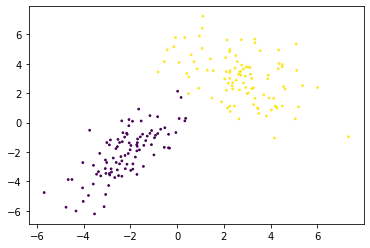

In [15]:
num_points = 100

mean_1 = [-2, -2]
cov_1 = [[2, 2], [2, 3]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [3, 3]
cov_2 = [[3, -1], [-1, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

In [16]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)
print('weights ')
print(GMM.weights_)

means 
[[ 2.71346626  3.02734677]
 [-2.18425561 -2.07113159]]
covariances 
[[[ 2.2872421  -1.08056112]
  [-1.08056112  2.66284396]]

 [[ 1.42425985  1.47694295]
  [ 1.47694295  2.82284531]]]
weights 
[0.50148109 0.49851891]


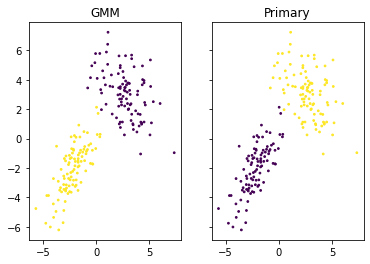

In [17]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Primary")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)